## Displaying Data with Seaborn
### Thinkful Lesson 1.3.3

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I decided to complete this lesson with data files provided for introductory Statistics text, The Practice of Statistics by Yates/Moore/McCabe.  The first is high school graduation rates by State and by region.

In [60]:
grad_rate = pd.read_csv('~/Downloads/gradRate.csv')

In [61]:
print(grad_rate.head(5))

        STATE  PCTGRAD REGION
0     ALABAMA     72.0      S
1      ALASKA     68.0      W
2     ARIZONA     78.0      W
3    ARKANSAS     81.0      S
4  CALIFORNIA     76.0      W


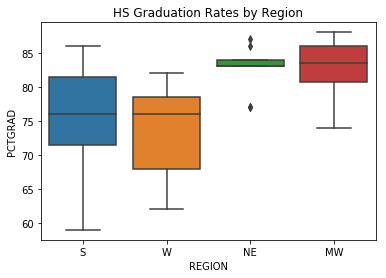

In [62]:
ax = sns.boxplot(x = 'REGION', y = 'PCTGRAD', data = grad_rate)
plt.title('HS Graduation Rates by Region')
plt.show()

The next data set I explored was a comparison of laundry soaps. Data was type (Liquid, Powder, Gel) Rating (higher is better) and PricePerLoad.

In [63]:
soap = pd.read_csv('~/Thinkful/soap.csv')

In [64]:
print(soap.head(10))

   ID    Type  Rating  PricePerLoad
0   1  Liquid      61            17
1   2  Liquid      59            22
2   3  Liquid      56            22
3   4  Liquid      55            16
4   5  Liquid      55            30
5   6  Liquid      52            23
6   7  Powder      51            11
7   8  Powder      50            15
8   9  Powder      50             9
9  10  Liquid      48            16


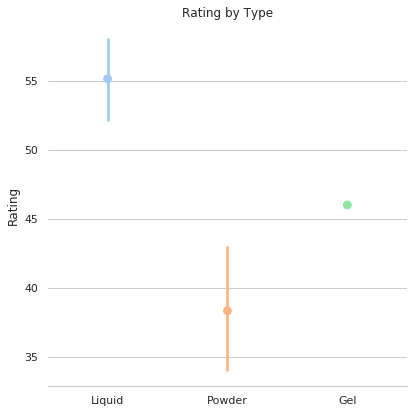

In [65]:
sns.set(style='whitegrid')
s = sns.catplot(x='Type',y='Rating',data=soap,
                   height=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
s.despine(left=True)
s.set_ylabels("Rating")
s.set_xlabels("")
plt.title('Rating by Type')
plt.show()

Finally, let's just create a scatterplot to see if price and rating are at all correlated.

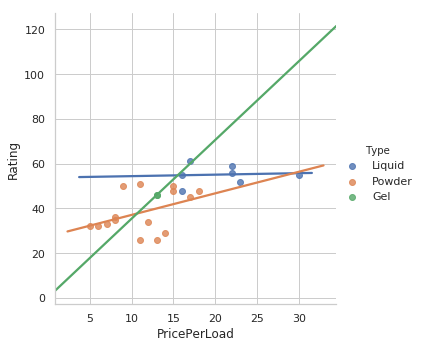

In [66]:
soapSP = sns.lmplot(y = 'Rating',
                    x = 'PricePerLoad',
                    data=soap,
                    fit_reg=True,
                    hue='Type',
                    ci = True)
plt.show()

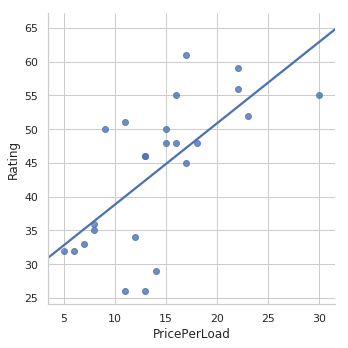

In [67]:
soapSP = sns.lmplot(y = 'Rating',
                    x = 'PricePerLoad',
                    data=soap,
                    fit_reg=True,
                    #hue='Type',
                    ci = True)
plt.show()

Question: How to get a regression line using ALL of the data?  These data are split by group at this point, so seaborn assumes you want regression lines for each data type.

## Exploring Plotting with Seaborn
### Complements of kaggle.com

Kaggle offers a free tutorial for using seaborn as a graphing package. https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners. 

In [1]:
import pandas as pd
reviews = pd.read_csv("~/Desktop/Thinkful/seabornData/winemag-data-130k-v2.csv", index_col=0)
import seaborn as sns

In [2]:
list(reviews)

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

### Countplot (aka Bar Chart)
Rather than a bar chart, seaborn calls it a "countplot"

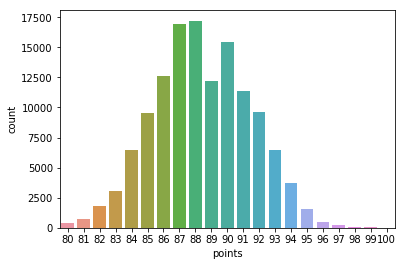

In [3]:
sns.countplot(reviews['points'])

### KDE Plot
Roughly equivalent to a line chart. KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93$, but several hundred prices 20.00$. If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data, shown below for the purposes of comparison, has exactly this problem!

Note that the x xais is a seaborn kdeplot is the variable being plotted (in this case, price), while the y axis is how often it occurs.

QUESTION: How does one interpret the y-scale on the graph below?

/home/john/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


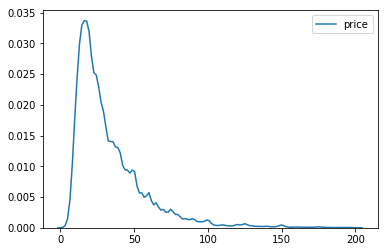

In [4]:
sns.kdeplot(reviews.query('price<200').price)

As a comparison, this is what this data looks like without smoothing.

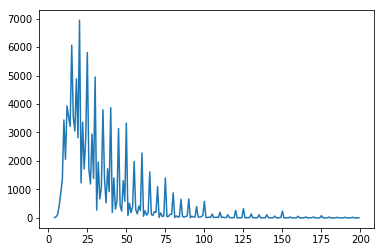

In [5]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

## Contour Plots
KDE plots can also be used to create a contour plot.  The format is just sns.kdeplot(x,y)

In [6]:
sample_reviews = reviews.sample(4000)

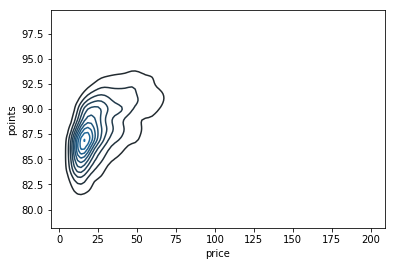

In [7]:
sns.kdeplot(sample_reviews.query('price<200').price,sample_reviews.query('price<200').points)

It just occured to me that I have no idea what this graph might be used for, nor what is it using to connect or "smooth" these datapoints.

NOTE: Creating these graph are very time intensive.

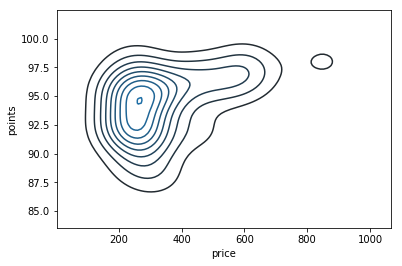

In [11]:
sns.kdeplot(sample_reviews.query('price>200').query('price<1000').price,
            sample_reviews.query('price>200').query('price<1000').points)

## Distplot
AKA a histogram

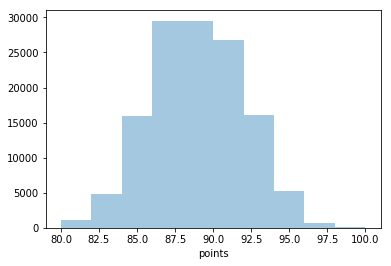

In [12]:
sns.distplot(reviews['points'], bins=10, kde=False)

It's always bothered me that the default setting is to NOT have borders shaded on histograms.  There is a simple fix for this:

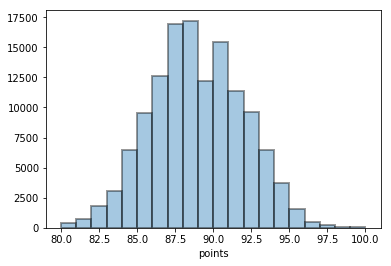

In [20]:
sns.distplot(reviews['points'], bins=20, kde=False,
             hist_kws=dict(edgecolor="k", linewidth=2))


## Bivariate Data

### JointPlot
AKA scatterplot

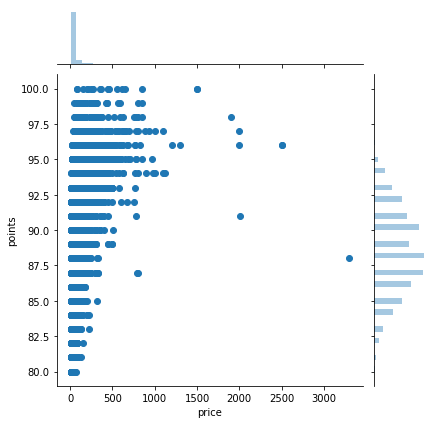

In [24]:
sns.jointplot(x='price',y='points', data=reviews)

A couple of observations:  

First, one gets two histograms, one for each variable by default. I would guess that's sometimes useful, but also offputting for a standard graphic in a document (sometimes there's too much information in a graph.

Second, Ratings only come in integers, so the graph will look a bit strange.  More control over the scale might be helpful.

Third, wine costing more than $1000 doesn't need to be in my graph, except to say that very expensive wine can be rated rather moderately.

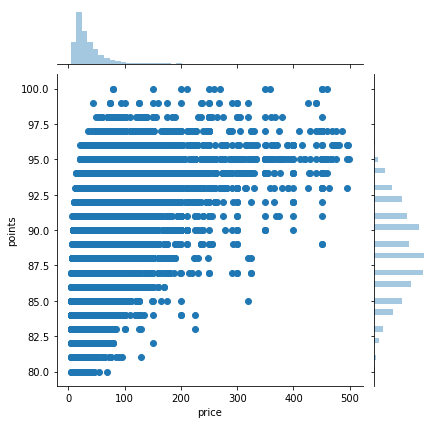

In [27]:
sns.jointplot(x='price',y='points', data=reviews[reviews['price']<500])

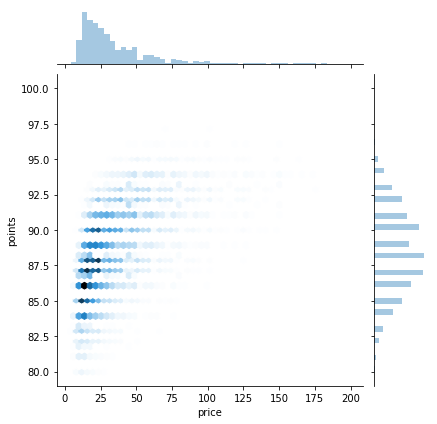

In [31]:
sns.jointplot(x='price',y='points', data=reviews[reviews['price']<200], kind = 'hex')

## Regression and Residual Plots

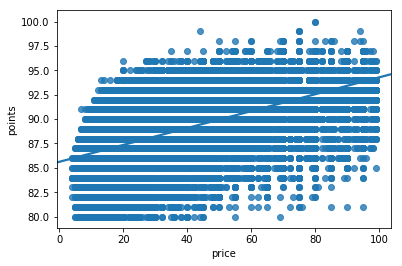

In [58]:
sns.regplot(x='price',y='points',data=reviews[reviews['price']<100])

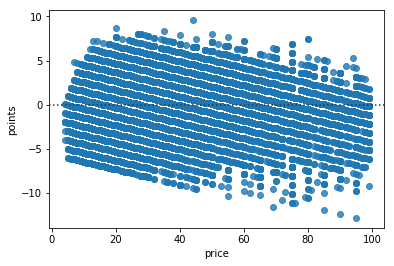

In [57]:
sns.residplot(x='price',y='points',data=reviews[reviews['price']<100])

## BoxPlot and ViolinPlot

Suppose I wanted to compare the Ratings of the countries with the most bottled review by this rating agency.

In [36]:
reviews.country.value_counts().head(5)

US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64

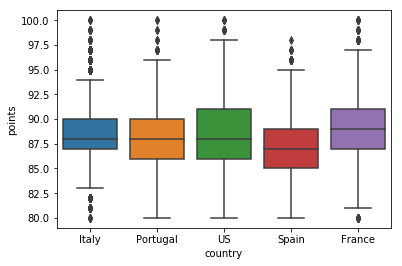

In [53]:
df = reviews[reviews.country.isin(reviews.country.value_counts().head(5).index)]

sns.boxplot(
    x='country',
    y='points',
    data = df
)

Note that there is no specific order for the boxplots.

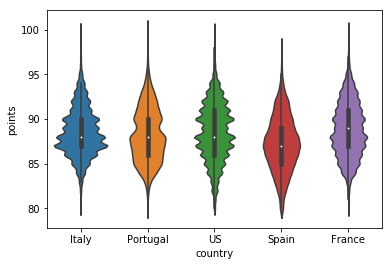

In [38]:
df = reviews[reviews.country.isin(reviews.country.value_counts().head(5).index)]

sns.violinplot(
    x='country',
    y='points',
    data = df
)

Note that this graph shows no indication that the US has far more data points.

## Quiz: Can I replicate these graphs?

In [40]:
pokemon = pd.read_csv("~/Desktop/Thinkful/seabornData/Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


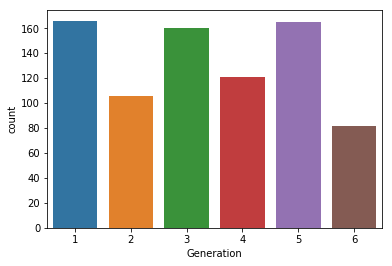

In [42]:
sns.countplot(pokemon['Generation'])

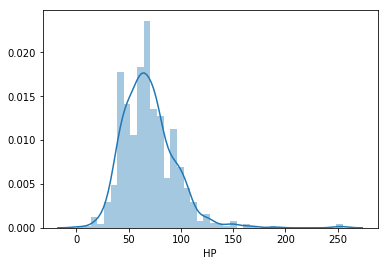

In [46]:
sns.distplot(pokemon['HP'], bins=40, kde=True)

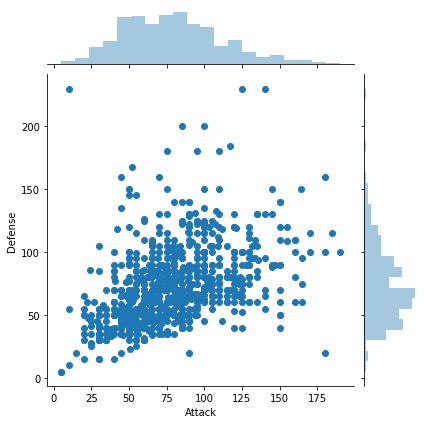

In [47]:
sns.jointplot(pokemon['Attack'],pokemon['Defense'])

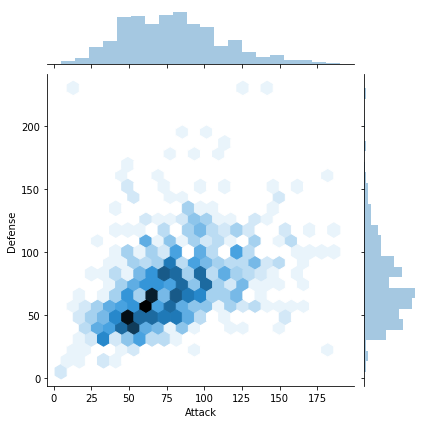

In [51]:
sns.jointplot(pokemon['Attack'],pokemon['Defense'],kind='hex')

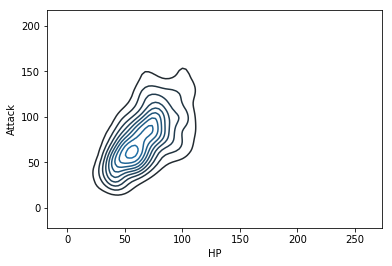

In [52]:
sns.kdeplot(pokemon['HP'], pokemon['Attack'])

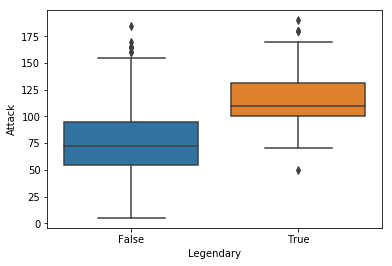

In [54]:
sns.boxplot(pokemon['Legendary'],pokemon['Attack'])